# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please use it with caution and critically assess the code and results.

## Overview

Dandiset 001174 focuses on the study of motor cortices in non-human primates using one-photon calcium imaging techniques. This Dandiset contains calcium imaging data obtained from the supplementary motor area (SMA) and primary motor area (M1) in rhesus macaques. The Dandiset allows for the examination of neuronal activity patterns in these regions, offering insights into motor control.

More information can be found on [Neurosift](https://neurosift.app/dandiset/001174).

## Notebook Objectives

This notebook covers:
1. Loading of the Dandiset using the DANDI API.
2. Visual exploration of imaging data.
3. Visualization of fluorescence time series data.

## Required Packages

- pynwb
- h5py
- remfile
- numpy
- matplotlib.pyplot

Ensure these are installed in your environment before running the notebook.


## Loading the Dandiset using the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

# Load NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"\nNWB Session Description: {nwb.session_description}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb



NWB Session Description: Calcium imaging in SMA during the spontaneous condition


## Visualizing Imaging Data

### OnePhotonSeries: First Plane

We will visualize the first plane from the OnePhotonSeries data.

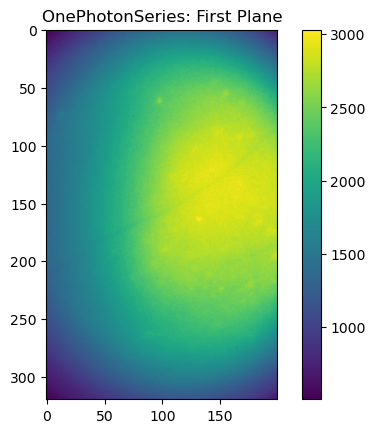

In [2]:
plane_data = nwb.acquisition["OnePhotonSeries"].data[0, :, :] # First Plane
plt.imshow(plane_data, cmap='viridis')
plt.title('OnePhotonSeries: First Plane')
plt.colorbar()
plt.show()

## Fluorescence Time Series

Here, we'll explore the fluorescence changes over time for a specific ROI.

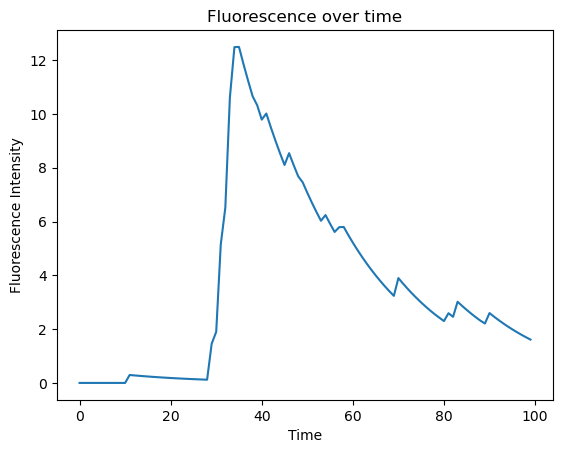

In [3]:
fluorescence_data = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"].data[:100, 0]  # First 100 time points for ROI 0
plt.plot(fluorescence_data)
plt.title('Fluorescence over time')
plt.xlabel('Time')
plt.ylabel('Fluorescence Intensity')
plt.show()

## Summary and Future Directions

This notebook demonstrates the basics of loading and visualizing data from Dandiset 001174. Future analyses could involve deeper exploration of time-series data and more advanced visualizations to study neuronal coactivation patterns.

Further exploration may include:
- Analyzing additional ROIs and comparing results across different sessions.
- Utilizing more advanced statistical techniques to derive insights from the data.

Please verify any analysis results thoroughly, as this notebook has been auto-generated and has not undergone comprehensive review.